In [1]:
!pip install xgboost
!pip install lightgbm

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
df =pd.read_csv('features.csv')
df

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


<font size='8'>Data Cleaning</font>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [5]:
print(df.isnull().sum())

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64


In [6]:
df.duplicated().sum()

0

In [7]:
numeric_cols = df.select_dtypes(include=['number']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

In [8]:
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    most_frequent = df[col].mode()[0]  
    df[col] = df[col].fillna(most_frequent)

In [9]:
print(df.isnull().sum())

Store           0
Date            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
dtype: int64


In [10]:
df.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000
mean,23.000000,59.356198,3.405992,5870.369802,1441.526149,796.728201,2071.613487,3421.955484,173.196752,7.825334
std,12.987966,18.678607,0.431337,6598.744531,5446.593934,7537.887934,4539.111378,9228.907117,38.384486,1.808971
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,132.653774,6.833000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,212.766994,8.519000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [11]:
df.dtypes

Store             int64
Date             object
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
IsHoliday          bool
dtype: object

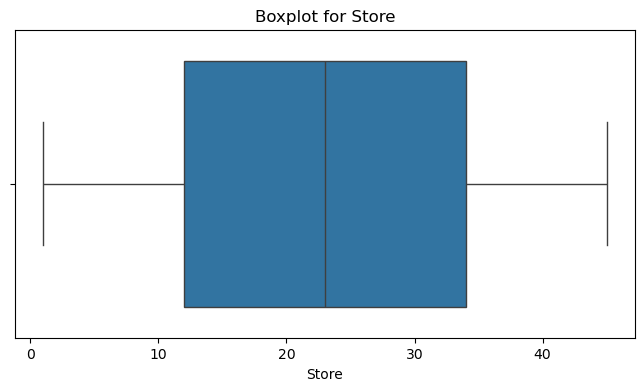

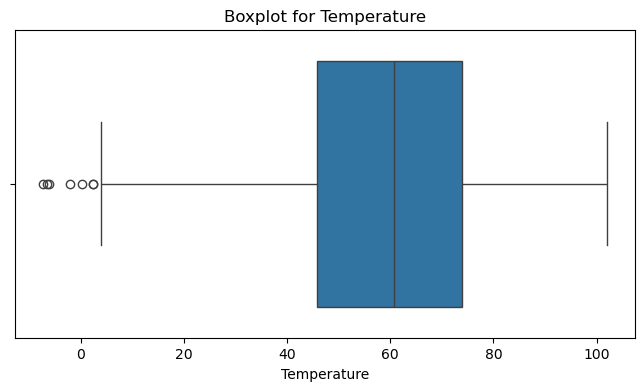

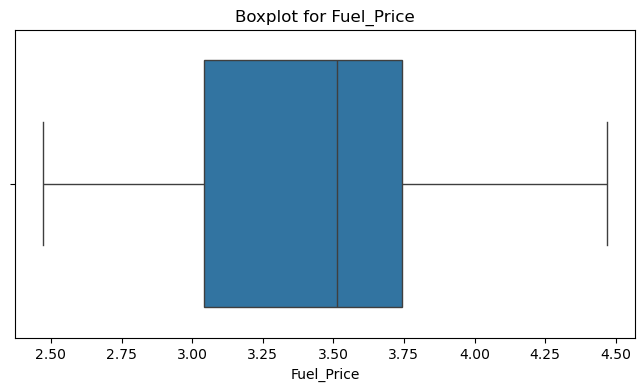

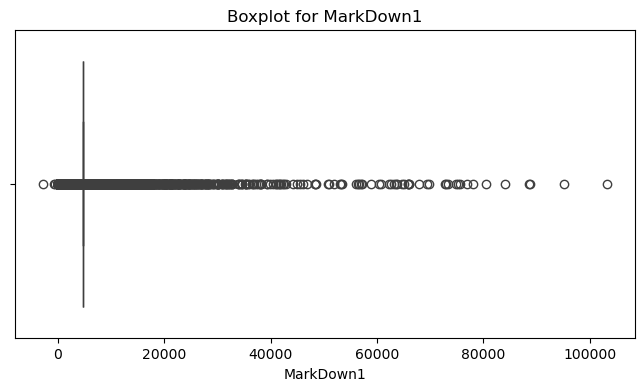

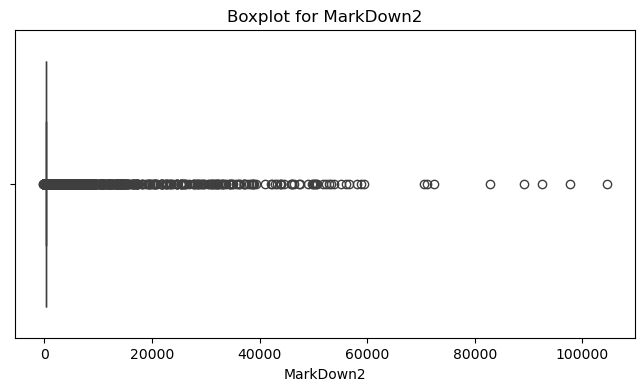

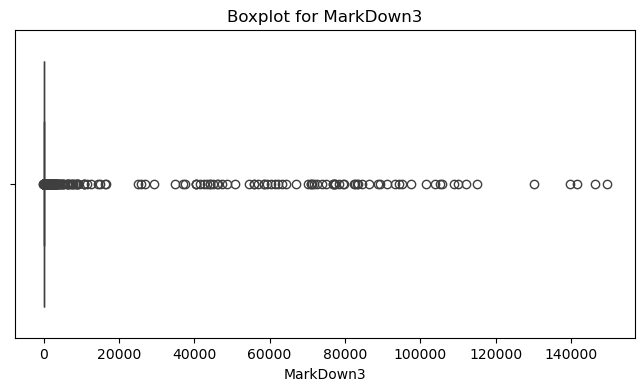

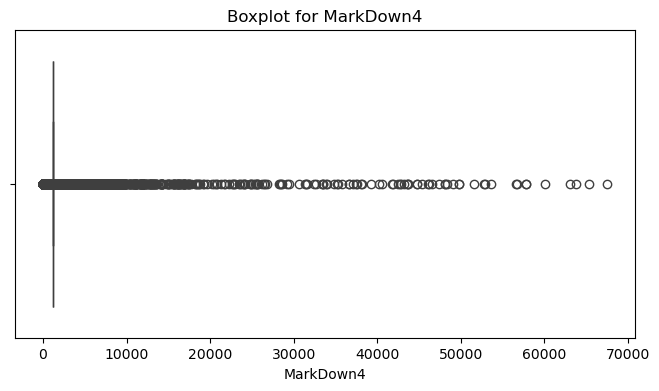

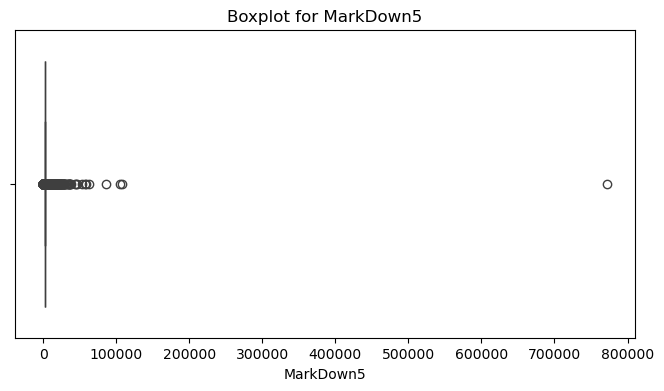

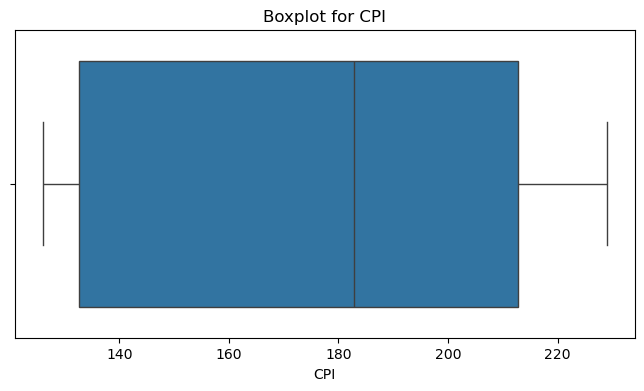

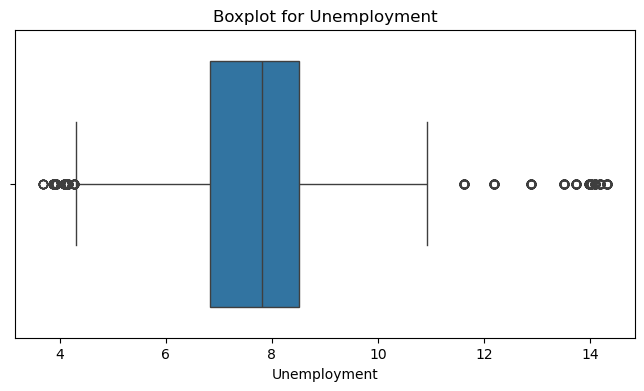

In [12]:
numeric_cols = df.select_dtypes(include=['number']).columns
for col in numeric_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

<font size='8'>Data Transformation</font>

In [14]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

print(df.head())

      Store       Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0         1 2010-02-05        42.31       2.572    4743.58     364.57   
2730     16 2010-02-05        19.79       2.580    4743.58     364.57   
5460     31 2010-02-05        39.05       2.572    4743.58     364.57   
3640     21 2010-02-05        39.05       2.572    4743.58     364.57   
4550     26 2010-02-05         9.55       2.788    4743.58     364.57   

      MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0         36.26   1176.425   2727.135  211.096358         8.106      False  
2730      36.26   1176.425   2727.135  189.381697         7.039      False  
5460      36.26   1176.425   2727.135  210.752605         8.324      False  
3640      36.26   1176.425   2727.135  210.752605         8.324      False  
4550      36.26   1176.425   2727.135  131.527903         8.488      False  


In [15]:
df['day'] = df['Date'].dt.day
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year
df['dayofweek'] = df['Date'].dt.dayofweek


In [16]:
def get_season(month):
    if month in [12,1,2]:
        return 'Winter'
    elif month in [3,4,5]:
        return 'Spring'
    elif month in [6,7,8]:
        return 'Summer'
    else:
        return 'Autumn'

df['season'] = df['Date'].dt.month.apply(get_season)


In [17]:
df['lag_1'] = df['Fuel_Price'].shift(1)
df['lag_7'] = df['Fuel_Price'].shift(7)
df['lag_30'] = df['Fuel_Price'].shift(30)

df.dropna(inplace=True)


<font size='8'>EDA</font>

In [19]:
seasonal_demand = df.groupby("season")[
    "Fuel_Price"
].sum()  # Using sum to see total volume per season
print(seasonal_demand)

season
Autumn    5917.690
Spring    8446.322
Summer    7391.291
Winter    6058.226
Name: Fuel_Price, dtype: float64


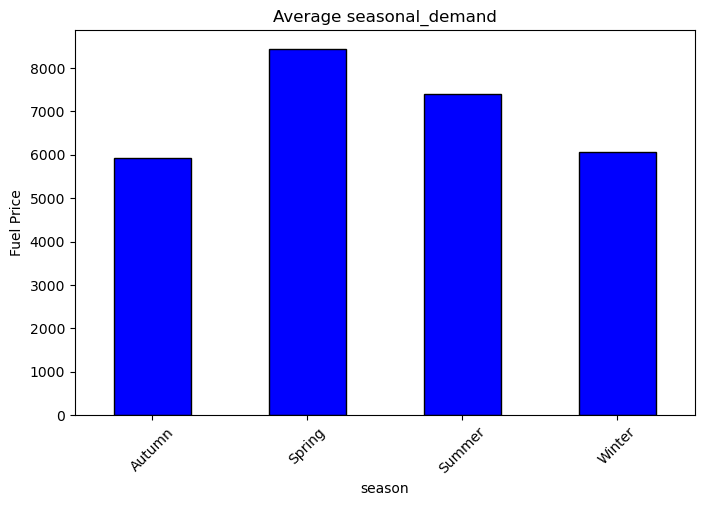

In [75]:
seasonal_demand.plot(kind="bar", figsize=(8, 5), color="blue", edgecolor="k")

plt.title("Average seasonal_demand")
plt.xlabel("season")
plt.ylabel("Fuel Price")
plt.xticks(rotation=45)
plt.show()

<font size='5'>A noticeable rise in fuel prices was observed during the spring months, suggesting seasonal demand or market-driven price adjustments.</font>

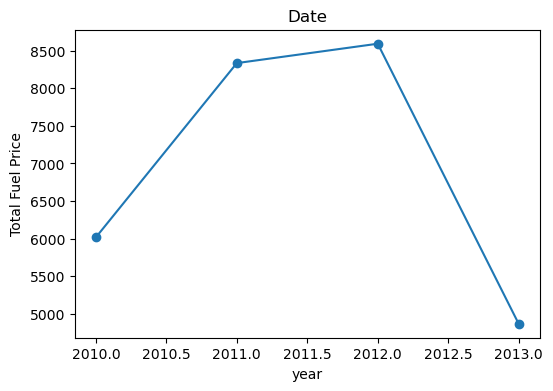

In [21]:
df.groupby("year")["Fuel_Price"].sum().plot(
    kind="line", marker="o", figsize=(6, 4)
)
plt.title("Date")
plt.ylabel("Total Fuel Price")
plt.show()

<font size='5'>Fuel prices experienced a rising trend from 2010 to 2012, likely influenced by economic factors, before</font>

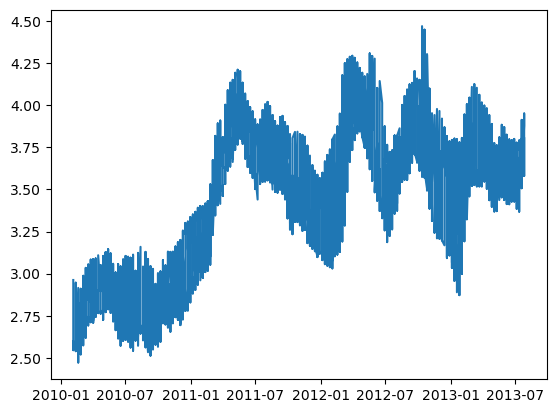

In [22]:
plt.plot(df['Date'], df['Fuel_Price'])


<font size='5'>Sales exhibited noticeable trends over time, with periodic peaks and drops, indicating the presence ofseasonality in customer demand</font>

<Axes: >

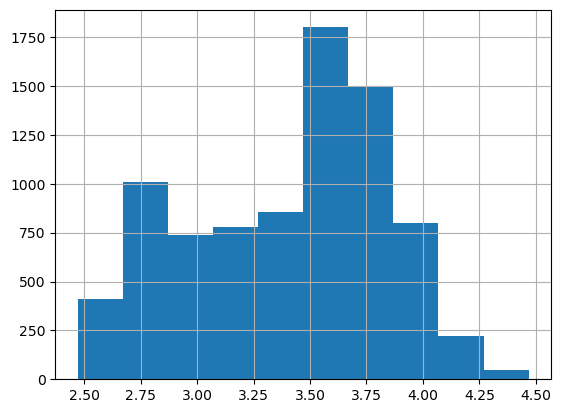

In [23]:
df['Fuel_Price'].hist()


In [24]:
df.groupby(df['Date'].dt.month)['Fuel_Price'].mean()


Date
1     3.279174
2     3.268246
3     3.506638
4     3.537252
5     3.582707
6     3.469490
7     3.383660
8     3.412591
9     3.432687
10    3.349590
11    3.333432
12    3.226003
Name: Fuel_Price, dtype: float64

In [33]:
le = LabelEncoder()
df['season'] = le.fit_transform(df['season'])

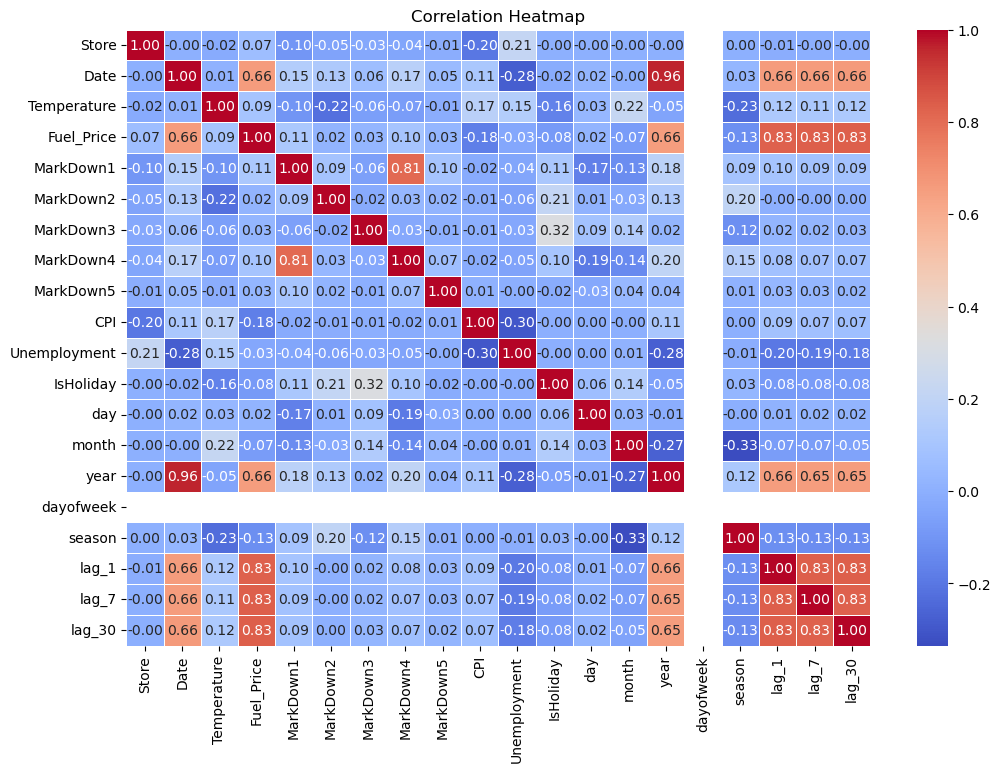

In [35]:
plt.figure(figsize=(12,8))

corr = df.corr()

sns.heatmap(
    corr,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=0.5
)

plt.title("Correlation Heatmap")
plt.show()

<font size='8'>Modeling</font>

In [38]:
X = df.drop(['Fuel_Price','Date'], axis=1)
y = df['Fuel_Price']


In [40]:
 X_train, X_test, y_train,y_test=train_test_split(X,y, test_size=0.2 ,random_state=42)


In [42]:
model= LinearRegression()

In [44]:
model.fit(X_train,y_train)

LinearRegression()

In [46]:
y_pred=model.predict(X_test)

In [48]:
slope=model.coef_
print('slope:',slope)

slope: [ 1.97800758e-04  3.61087890e-04  1.39516568e-06  9.67946384e-07
  2.68512487e-07 -2.26548045e-07 -1.12826858e-07 -2.56336373e-03
  2.30136136e-02 -1.06876846e-02  4.54516020e-04  5.73559710e-04
  5.71932349e-02 -4.16333634e-17 -1.09335701e-02  2.82913032e-01
  2.96239372e-01  2.87628008e-01]


In [50]:
intercept=model.intercept_
print('intercept:',intercept)

intercept: -114.34380581440077


In [52]:
r2=r2_score(y_test ,y_pred)
print(f"R2 Score {r2}")

R2 Score 0.8672697896964023


In [54]:
MSE=mean_squared_error(y_test ,y_pred)
print(f"Mean Squared Error {MSE}")

Mean Squared Error 0.02492692324692411


In [56]:
MAE=mean_absolute_error(y_test ,y_pred)
print(f"Mean Absolute Error {MAE}")

Mean Absolute Error 0.12403196472293414


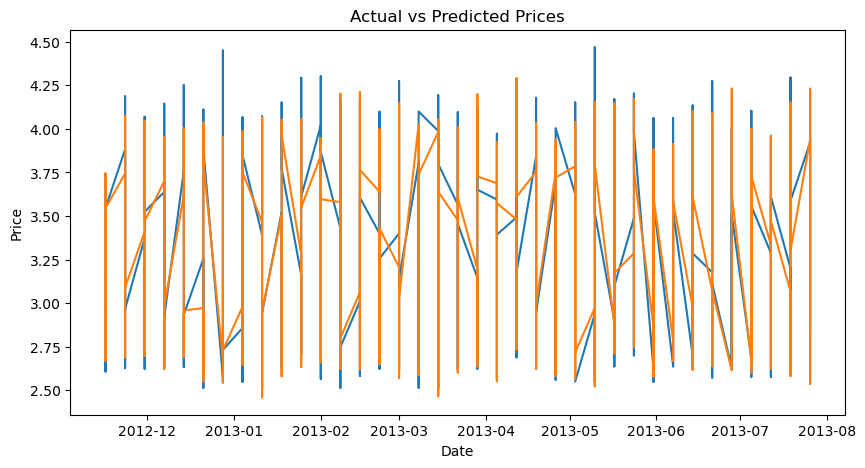

In [78]:
plt.figure(figsize=(10,5))
plt.plot(df['Date'].iloc[-len(y_test):], y_test)
plt.plot(df['Date'].iloc[-len(y_test):], y_pred)
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Actual vs Predicted Prices")
plt.show()

In [60]:
xgb_model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)


In [62]:
xgb_model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [64]:
y_pred_xgb = xgb_model.predict(X_test)

In [66]:
r2_xgb=r2_score(y_test ,y_pred_xgb)
print(f"R2 Score {r2_xgb}")

R2 Score 0.9629122697198901


In [68]:
MSE_xgb=mean_squared_error(y_test ,y_pred_xgb)
print(f"Mean Squared Error {MSE_xgb}")

Mean Squared Error 0.006965128767447349


In [70]:
MAE_xgb=mean_absolute_error(y_test ,y_pred_xgb)
print(f"Mean Absolute Error {MAE_xgb}")

Mean Absolute Error 0.06267418526434432


<font size='5'>After trying different models, XGBoost achieved better performance compared to Linear Regression.
This indicates that the relationship between the features and the target is not purely linear, and a more flexible model like XGBoost was able to capture the underlying patterns and handle the noise in the data more effectively.</font>